$$
\min_{\mathbf{w}, b} \frac{1}{2} ||\mathbf{w}||^2
$$


$$
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1
$$

- 하드마진
    - 데이터가 선형적으로 완벽하게 분리 될 수 있는 경우 오차 없이 마진 최대 


$$
\min_{\mathbf{w}, b, \xi} \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{n} \xi_i
$$

$$
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i
$$

- 데이터 포인트의 레이블(w x(데이터의 포인트) +b)>= 1-c
- 제약 조건이 필요한 이유?
    - 마진을 최대화 한다고만 하면 데이터가 올바르게 분류된다는 보장은 없다. 
    - 결정 경계의 올바른 쪽에 위치하도록 강제하는 것, 이걸 통해 마진 최대화와 분류 정확성의 균형을 잡으려고 하는 것
    - 마진을 최대화 하는 동시에, 오분류 최소화 하려고 하는 것 

- 소프트 마진
    - 데이터가 완벽하게 분리되지 않을 경우 , 오분류 허용과 마진 최대화 균형을 맞추는 것 목표

$$
\text{Margin} = \frac{2}{||\mathbf{w}||}
$$


- 결정 경계(초평면) 데이터 포인트들의 사이의 가장 가까운 거리 
- SVM 목표는 마진을 최대화 -> 가중치 벡터를 최소화 하는 문제로 바꾼 것

$$
\min_{\mathbf{w}, b, \xi} \left( \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{n} \xi_i \right)
$$

- 라그랑주 승수법을 사용한 최적화를 진행하게 되면
    - 라그랑주 승수법을 제약 조건이 있는 최적화 문제를 풀기 위한 방법 -> SVM 소프트 마진은 제약 조건을 만족하면서 목적함수를 최소화 하는 것
    
    - 

- 듀얼 문제로 변환하는 의미
    - 듀얼 문제로 계산하면 프라이멀 문제로 직접 풀기가 어려운 경우 라그랑주 승수 이요해서 문제를 다시 표현하는 것
        - 변환이 쉬어서 계산이 더 간단해 지는 것
        
    - 계산 단순화
    - 서포트 벡터 선택 : 0보다 큰 데이터의 포인트들이 서포트 벡터가 된다. 
    - 커널 트릭에 대한 이유 : 커널 함수 적용하기에 더 유리하다.

## SVM이 작동하는 원리를 간단하게 살펴보자!

- 예시 데이터 
    - 양성 클래스  = 1
    - x1, x2 
    - x1 = (1,2), y = 1
    - x2 = (2,3), y = 1
    
    - 음성 클래스 =  -1
    - x3 = (4,1) y = -1
    - x4 = (3,0) y = -1
    
    --- 
    - SVM 의 결정 경계를 만들고, 서포트 벡터를 계산
    
    
    - 기본 최적화 문제 
    - 가중치 벡터, 절편에 대해서 제약조건과 함께 정리하고
    - 라그랑주 승수와 듀얼문제로 풀기
        - 서포트 벡터 계산(예시)
        - a1 = 0.5
        - a2 = 0.3
        - a3 = 0.4
        - a4 = 0 (서포트 벡터가 아니다.) 
    - 결정경계를 계산
        - x1 =(1,2), a1= 0.5, y=1 = (0.5,1)
        - x2 =(2,3), a1= 0.3, y=1 = (0.6,0.9)
        - x3 =(4,1), a1= 0.4, y=-1 = (-1.6, -0.4)
        
        = w = (0.5,1) + (0.6,0.9) + (-1.6, -0.4) = (-0.5, 1.5)
    - b 절편의 계산
        - b = y1 -w*x1  (1,2)
        = 1-(0.5,1) + (1.5*2) 
        = -1.5
        
        
    - 최종 결정경계방정식
        - w * x + b= 0
        - -0.5x1 + 1.5x2 - 1.5=0
        = x2 = 1/3x1 +1  SVM 결정경계방정식

- 라그랑주 승수 계산하는 방법
- (1,2) y = 1
- (2,3) y = -1

- a값의 최적화 조건 
    - a1 편미분으로 진행
    - a2 편미분으로 진행 

In [2]:
## 예시 데이터를 만들어서 SVM을 구현하자!

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X1 = np.random.randn(20,2) + np.array([2,2])
X2 = np.random.randn(20,2) + np.array([-2,-2])


X = np.vstack((X1, X2))
y = np.hstack((np.ones(20), -np.ones(20)))

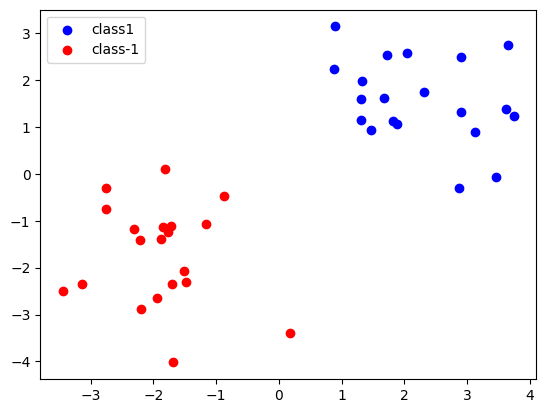

In [6]:
## 데이터 시각화

plt.scatter(X[:20,0], X[:20,1], color='b', label ='class1')
plt.scatter(X[20:,0], X[20:,1], color='r', label ='class-1')
plt.legend()
plt.show()

In [8]:
from numpy import linalg

# SVM 만들기 위한 함수

# 선형 커널 
def linear_kernel(x1, x2):
    """
    두 벡터 x1 x2의 내적 계산해서 선형 커널 값 반환
    유사도 측정하는 사용
    """
    return np.dot(x1,x2)

def fit_svm(X,y, C=1.0):
    """
    SVM 듀얼문제 최적화 라그랑주 승수(alpha), 결정 경계 법선 벡터 (w), 절편(b) 찾는 함수 필요
    매개변수:
        - X :입력데이터(n_samples, n_features)
        - y : 클래스( -1, 1)
        - C : 조절하는 하이퍼파라미터
    반환값:
        - w : 결정경계 법선벡터
        - b : 결정경계의 절편
        - alpha: 최적화된 라그랑주 승수들
    """
    #데이터 포인트 개수와 특징 개수
    n_samples, n_features = X.shape
    alpha = np.zeros(n_samples) # 라그랑주 승수 alpha값 초기화
    
    #선형 커널 행렬 계산
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = linear_kernel(X[i], X[j]) # 각 데이터 포인트들의 내적을 계산하여 커널 행렬 구성
            
    # 라그랑주 승수 최적화 반복
   # 선형 커널 행렬 (Gram matrix) 계산
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = linear_kernel(X[i], X[j])  # 각 데이터 포인트 간 내적을 계산하여 커널 행렬 구성
    
    # 라그랑주 승수 최적화를 위한 반복 (SMO 알고리즘 기반의 단순 최적화)
    max_iter = 1000  # 최대 반복 횟수
    tol = 1e-5  # 수렴 기준(알파의 변화량이 이보다 작으면 최적화 종료)
    for _ in range(max_iter):
        alpha_prev = np.copy(alpha)  # 이전 라그랑주 승수 값을 저장하여 비교
        
        # 각 데이터 포인트에 대해 라그랑주 승수 alpha 값을 업데이트
        for i in range(n_samples):
            j = np.random.randint(0, n_samples)  # 무작위로 두 번째 데이터 포인트 선택
            if i == j:
                continue  # i와 j가 같으면 패스
            
            # 두 라그랑주 승수 alpha[i]와 alpha[j]를 업데이트하기 위한 eta 계산
            eta = 2 * K[i, j] - K[i, i] - K[j, j]  # eta는 두 점 사이의 내적을 이용한 값
            if eta >= 0:
                continue  # eta가 양수면 업데이트할 수 없음
            
            # 라그랑주 승수 업데이트 (SMO 알고리즘의 핵심 업데이트 단계)
            alpha[i] = alpha[i] - (y[i] * (K[i, j] * alpha[j] - y[i] * y[j])) / eta
            
            # alpha 값은 0과 C 사이로 제한 (라그랑주 승수의 범위를 0에서 C로 제한)
            alpha[i] = max(0, min(C, alpha[i]))
        
        # 종료 조건 (라그랑주 승수의 변화량이 매우 작아지면 수렴했다고 판단)
        diff = np.linalg.norm(alpha - alpha_prev)  # 알파 값의 변화량 계산
        if diff < tol:
            break  # 변화량이 tol보다 작으면 최적화 종료
    
    # 최적의 w(결정 경계의 법선 벡터) 계산
    w = np.zeros(n_features)  # w 초기화
    for i in range(n_samples):
        w += alpha[i] * y[i] * X[i]  # w = sum(alpha_i * y_i * X_i), 서포트 벡터가 w를 정의
    
    # 절편 b 계산 (결정 경계가 y = 0이 되는 절편)
    b = np.mean([y[i] - np.dot(w, X[i]) for i in range(n_samples)])
    
    return w, b, alpha  # 법선 벡터 w, 절편 b, 최종 알파 값을 반환

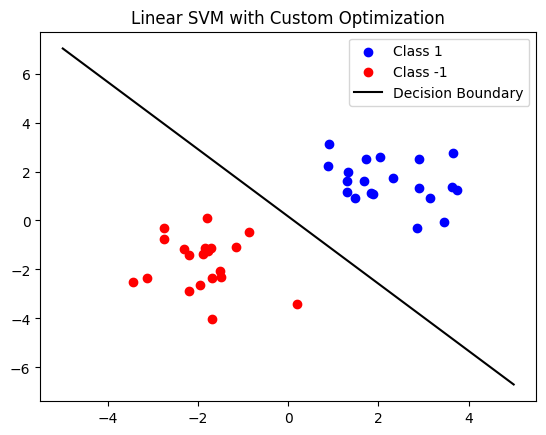

In [9]:
w, b, alpha = fit_svm(X, y)

# 하이퍼플레인 그리기 함수
def plot_svm(w, b, X, y):
    """
    학습된 SVM 모델의 하이퍼플레인(결정 경계)을 시각화하는 함수.
    매개변수:
        - w: 결정 경계의 법선 벡터
        - b: 절편
        - X: 입력 데이터셋
        - y: 레이블
    """
    
    plt.scatter(X[:20, 0], X[:20, 1], color='b', label='Class 1')  # 첫 번째 클래스 데이터 (파란색)
    plt.scatter(X[20:, 0], X[20:, 1], color='r', label='Class -1')  # 두 번째 클래스 데이터 (빨간색)
    
    # 결정 경계 그리기 (y = -(w[0] * x + b) / w[1])
    x_plot = np.linspace(-5, 5, 100)  # x 축에 대한 값 범위
    y_plot = -(w[0] * x_plot + b) / w[1]  # 결정 경계 방정식
    plt.plot(x_plot, y_plot, color='k', label='Decision Boundary')  # 결정 경계 선 그리기
    
    plt.legend()
    plt.title("Linear SVM with Custom Optimization")  # 그래프 제목
    plt.show()

# SVM 모델 결과 시각화
plot_svm(w, b, X, y)
